### Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

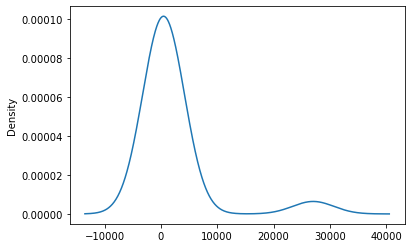

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

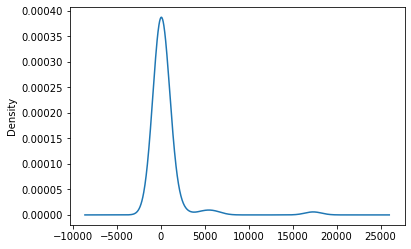

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(labels=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(labels=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Optimize Neural Network Model

#### Run Keras Tuner to Determine a Good Number of Neurons and Hidden Layers to Test

In [15]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=20,
        max_value=81,
        step=10), activation=activation, input_dim=len(X_train[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=20,
            max_value=81,
            step=10),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [16]:
# Create Instance of Keras Tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=3,
    overwrite=True)

In [17]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 90 Complete [00h 00m 29s]
val_accuracy: 0.7325947284698486

Best val_accuracy So Far: 0.7336443066596985
Total elapsed time: 00h 16m 52s
INFO:tensorflow:Oracle triggered exit


In [18]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 80,
 'num_layers': 3,
 'units_0': 50,
 'units_1': 60,
 'units_2': 60,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0072'}

In [19]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5561 - accuracy: 0.7336 - 452ms/epoch - 2ms/step
Loss: 0.5561047792434692, Accuracy: 0.7336443066596985


In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Use starting point from keras tuner
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                3520      
                                                                 
 dense_6 (Dense)             (None, 60)                4860      
                                                                 
 dense_7 (Dense)             (None, 60)                3660      
                                                                 
 dense_8 (Dense)             (None, 1)                 61        
                                                                 
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
optimized_checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every fifth epoch
cp_callback = ModelCheckpoint(
    filepath=optimized_checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, steps_per_epoch=1, callbacks=[cp_callback])

Epoch 1/100
1/1 [==============================] - 1s 523ms/step - loss: 0.6907 - accuracy: 0.5580
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6656 - accuracy: 0.6461
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6457 - accuracy: 0.6745
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6302 - accuracy: 0.6871
Epoch 5/100

Epoch 5: saving model to optimized_checkpoints\weights.05.hdf5
1/1 [==============================] - 0s 43ms/step - loss: 0.6184 - accuracy: 0.6918
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6094 - accuracy: 0.6918
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6026 - accuracy: 0.7028
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5974 - accuracy: 0.7133
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5932 - accuracy: 0.7163
Epoch 10/100

Epoch 10: saving model to optimized_che

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7296 - 353ms/epoch - 1ms/step
Loss: 0.5559417605400085, Accuracy: 0.7295626997947693


#### Attempt to remove noisy values 

In [24]:
new_application_df = pd.read_csv("data/charity_data.csv")
new_application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [25]:
# Bin App Type and Classification like above
classification_count = new_application_df.CLASSIFICATION.value_counts()
app_count = new_application_df.APPLICATION_TYPE.value_counts()

In [26]:
# Determine which values to replace if counts are less than ..?
replace_application = list(app_count[app_count < 500].index)

# Replace in dataframe
for cls in replace_application:
    new_application_df.APPLICATION_TYPE = new_application_df.APPLICATION_TYPE.replace(cls,"Other")


# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1500].index)

# Replace in dataframe
for cls in replace_class:
    new_application_df.CLASSIFICATION = new_application_df.CLASSIFICATION.replace(cls,"Other")

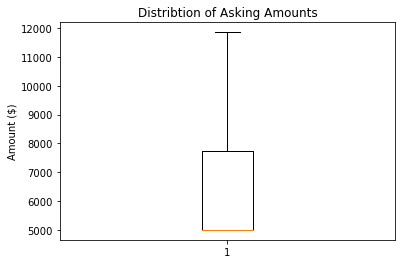

In [27]:
# EDA of Asking Amounts to look for noisy Data
# Plot boxplot of non outliers
plt.boxplot(new_application_df.ASK_AMT, showfliers=False)
plt.title("Distribtion of Asking Amounts")
plt.ylabel("Amount ($)")
plt.show()

In [28]:
# More than half the data is $5000. Need to bin Asking Amounts.
new_application_df.ASK_AMT.value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [29]:
# Check the summary statistics for Asking Amount to Determine Binning Amounts
new_application_df.ASK_AMT.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [30]:
# Bin asking amounts into $5000, $5001 - $7500, $7501 - $12,000, $12,000+
replace_amounts = new_application_df.ASK_AMT

for amt in replace_amounts:
    if amt <= 5000:
        new_application_df.ASK_AMT = new_application_df.ASK_AMT.replace(amt,"5000 or less")
    elif amt <= 7500:
        new_application_df.ASK_AMT = new_application_df.ASK_AMT.replace(amt,"5001-7500")
    elif amt <= 12000:
        new_application_df.ASK_AMT = new_application_df.ASK_AMT.replace(amt,"7501-12,000")
    else:
        new_application_df.ASK_AMT = new_application_df.ASK_AMT.replace(amt,"12,000+")
        
new_application_df.ASK_AMT.value_counts()

5000 or less    25398
12,000+          8197
7501-12,000       402
5001-7500         302
Name: ASK_AMT, dtype: int64

In [31]:
new_application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
new_application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000 or less,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,"12,000+",1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000 or less,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,5001-7500,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,"12,000+",1


In [32]:
# Use One Hot Encoder
# Generate our categorical variable lists
application_cat = new_application_df.dtypes[new_application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(new_application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)

# Merge one-hot encoded features and drop the originals
new_application_df = new_application_df.merge(encode_df, left_index=True, right_index=True).drop(labels=application_cat, axis=1)
new_application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,"ASK_AMT_12,000+",ASK_AMT_5000 or less,ASK_AMT_5001-7500,"ASK_AMT_7501-12,000"
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [33]:
# Split our preprocessed data into our features and target arrays
y = new_application_df["IS_SUCCESSFUL"].values
X = new_application_df.drop(labels=["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Use same starting points
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3760      
                                                                 
 dense_10 (Dense)            (None, 60)                4860      
                                                                 
 dense_11 (Dense)            (None, 60)                3660      
                                                                 
 dense_12 (Dense)            (None, 1)                 61        
                                                                 
Total params: 12,341
Trainable params: 12,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
optimized_checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every fifth epoch
cp_callback = ModelCheckpoint(
    filepath=optimized_checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)


In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, steps_per_epoch=1, callbacks=[cp_callback])

Epoch 1/100
1/1 [==============================] - 1s 529ms/step - loss: 0.6825 - accuracy: 0.5545
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.6569 - accuracy: 0.6120
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6382 - accuracy: 0.6673
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6249 - accuracy: 0.6806
Epoch 5/100

Epoch 5: saving model to optimized_checkpoints\weights.05.hdf5
1/1 [==============================] - 0s 42ms/step - loss: 0.6153 - accuracy: 0.6868
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6081 - accuracy: 0.6978
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6024 - accuracy: 0.7012
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5976 - accuracy: 0.7021
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 0.5935 - accuracy: 0.7125
Epoch 10/100

Epoch 10: saving model to optimized_che

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5535 - accuracy: 0.7305 - 347ms/epoch - 1ms/step
Loss: 0.5535223484039307, Accuracy: 0.7304956316947937


In [39]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_optimization.h5")